## Lab Introduction
Mycology is a branch of biology that generally deals with the study of fungi and mushrooms, and particularly their genetic and biochemical make-up, and their use to humans. Throughout history, fungi have been used for tinder, medicine, and food. For hundreds of years, specific mushrooms have been used as folk medicine in Russian, China, and Japan. Scientists elsewhere have also documented many medicinal uses of mushrooms as well, but not all mushrooms are beneficial--some are quite deadly.

In this lab, you're going to use decision trees to peruse The Mushroom Data Set, drawn from the Audobon Society Field Guide to North American Mushrooms (1981). The data set details mushrooms described in terms of many physical characteristics, such as cap size and stalk length, along with a classification of poisonous or edible.

As a standard disclaimer, if you eat a random mushroom you find, you are doing so at your own risk. While every effort has been made to ensure that the information contained with the data set is correct, please understand that no one associated with this course accepts any responsibility or liability for errors, omissions or representations, expressed or implied, contained therein, or that might arise from you mistakenly identifying a mushroom. Exercise due caution and just take this lab as informational purposes only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation
Visit the [data set's page](https://archive.ics.uci.edu/ml/datasets/Mushroom), read through it carefully and download the dataset.

Load up the mushroom dataset into dataframe `X` and verify you did it properly, and that you have not included any features that clearly shouldn't be part of the dataset.

You should not have any doubled indices. You can check out information about the headers present in the dataset using the link we provided above. Also make sure you've properly captured any NA values.

In [2]:
df = pd.read_csv('agaricus-lepiota.data', names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# An easy way to show which rows have nans in them:
df[pd.isnull(df).any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


For this simple lab, just drop any row with a nan in it, and then print out your dataset's shape:

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we presented you in Module 5, using `canadian:0`, `kama:1`, and `rosa:2`.

In [19]:
X = df.drop('class', axis = 1)
y = df['class']

In [26]:
X = pd.get_dummies(X, drop_first=True)

Encode the entire dataframe using dummies:

Split your data into `test` and `train` sets. Your `test` size should be 30% with `random_state` 7.

Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## 2. Training and Evaluating the Model

Create an DT classifier. No need to set any parameters:

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score

In [30]:
model = DecisionTreeClassifier()

Train the classifier on the `training` data and labels; then, score the classifier by accuracy and F1 score on the `testing` data and labels:

In [33]:
model.fit(X_train, y_train)
ypred = model.predict(X_test)
score = accuracy_score(y_test, ypred)

In [34]:
print("High-Dimensionality Score: ", round((score*100), 3))

High-Dimensionality Score:  100.0


Use the code on the course's SciKit-Learn page to output a .DOT file, then render the .DOT to .PNGs.

You will need graphviz installed to do this. On macOS, you can `brew install graphviz`. On Windows 10, graphviz installs via a .msi installer that you can download from the graphviz website. Also, a graph editor, gvedit.exe can be used to view the tree directly from the exported tree.dot file without having to issue a call. On other systems, use analogous commands.

If you encounter issues installing graphviz or don't have the rights to, you can always visualize your .dot file on the website: http://webgraphviz.com/.

In [54]:
y.unique()

array(['p', 'e'], dtype=object)

In [55]:
model.classes_

array(['e', 'p'], dtype=object)

In [65]:
y_train.value_counts()

e    2956
p    2730
Name: class, dtype: int64

In [72]:
y_train[X_train['odor_n'] > 0.5].value_counts()

e    2384
p      88
Name: class, dtype: int64

In [66]:
y[0]

'p'

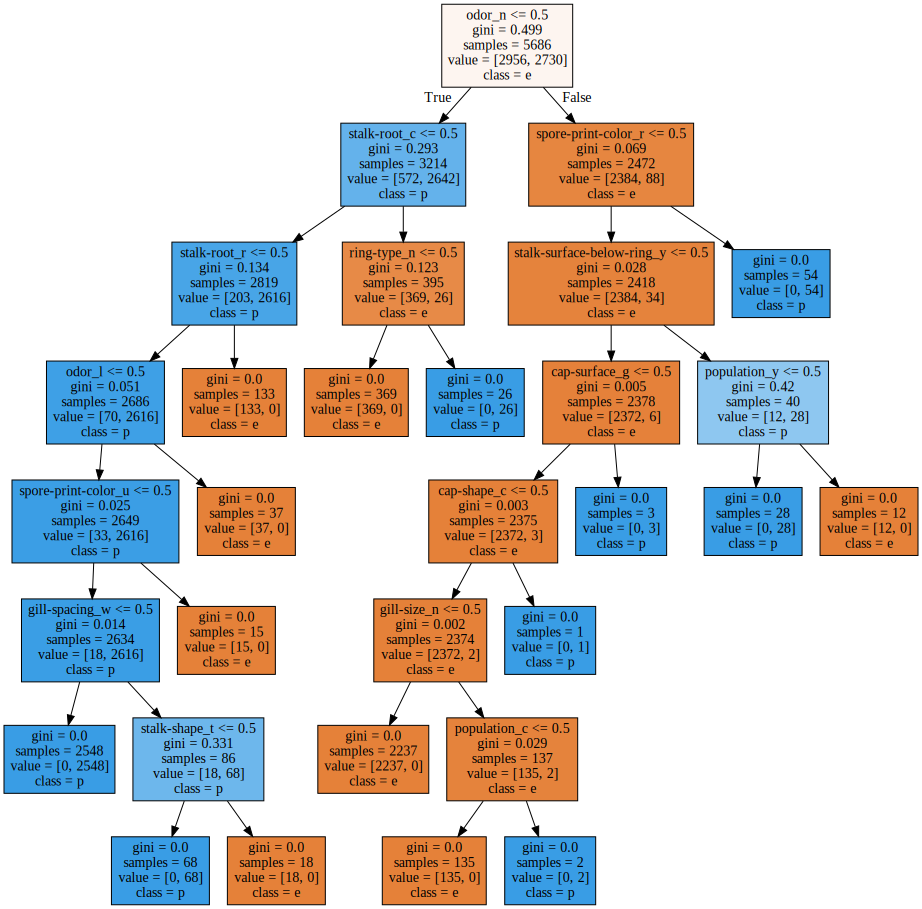

In [73]:
import graphviz
tree = export_graphviz(model,
                      feature_names=X.columns,
                      class_names=model.classes_,
                      filled=True)
graphviz.Source(tree)


In [45]:
file = graphviz.Source(tree)
file.render(filename = 'test', format='png')

'test.png'

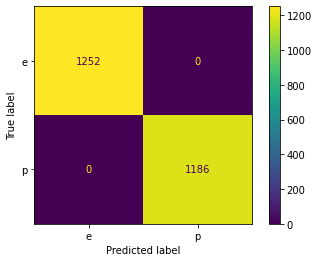

In [37]:
plot_confusion_matrix(model, X_test, y_test)

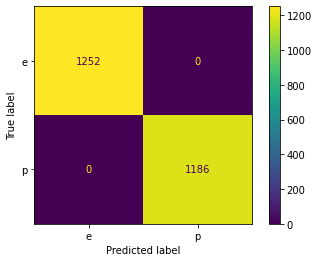

In [75]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)

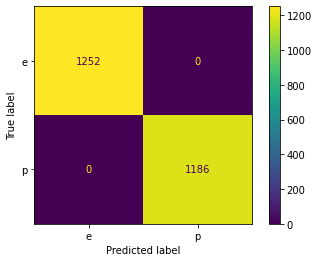

In [76]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)

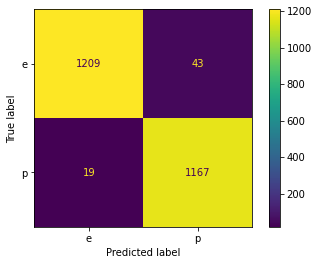

In [81]:
model = DecisionTreeClassifier(max_depth=4, max_features=30)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)